In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [51]:
df = pd.read_csv('../../data/raw/mouvements_stock_fictifs.csv', parse_dates=['date'])
ananas = df[df['product_name'] == 'Ananas'].copy()
ananas = ananas.sort_values('date')

In [52]:
ananas['year_month'] = ananas['date'].dt.to_period('M')
ananas_import = ananas[ananas['type_movement'] == 'import']
ananas_export = ananas[ananas['type_movement'] == 'export']

monthly_import = ananas_import.groupby('year_month')['quantity'].sum()
monthly_export = ananas_export.groupby('year_month')['quantity'].sum().abs()


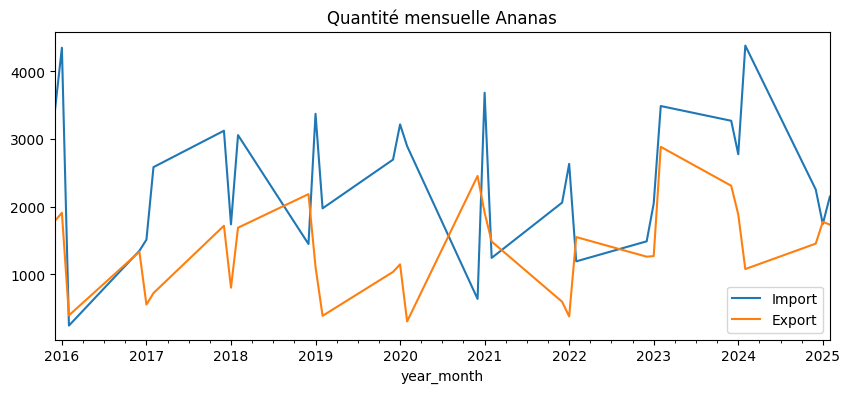

In [53]:
plt.figure(figsize=(10,4))
monthly_import.plot(label='Import')
monthly_export.plot(label='Export')
plt.legend()
plt.title('Quantité mensuelle Ananas')
plt.show()

In [54]:
# Préparation des données pour l'import
monthly_import = monthly_import.reset_index()
monthly_import['month_num'] = np.arange(len(monthly_import))
X_import = monthly_import[['month_num']]
y_import = monthly_import['quantity']

# Préparation des données pour l'export
monthly_export = monthly_export.reset_index()
monthly_export['month_num'] = np.arange(len(monthly_export))
X_export = monthly_export[['month_num']]
y_export = monthly_export['quantity']


In [55]:
# Modèle pour l'import
model_import = LinearRegression()
model_import.fit(X_import, y_import)

# Modèle pour l'export
model_export = LinearRegression()
model_export.fit(X_export, y_export)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
# Prédire l'import pour le mois prochain
next_month_num_import = X_import['month_num'].max() + 1
next_month_df = pd.DataFrame({'month_num': [next_month_num_import]})
pred_import = model_import.predict(next_month_df)
print(f"Quantité d'Ananas à importer prévue pour le mois prochain : {int(pred_import[0])}")

# Prédire l'export pour le mois prochain
next_month_num_export = X_export['month_num'].max() + 1
next_month_df = pd.DataFrame({'month_num': [next_month_num_export]})
pred_export = model_export.predict(next_month_df)
print(f"Quantité d'Ananas à exporter prévue pour le mois prochain : {int(pred_export[0])}")

Quantité d'Ananas à importer prévue pour le mois prochain : 2489
Quantité d'Ananas à exporter prévue pour le mois prochain : 1678


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

rmse = np.sqrt(mean_squared_error(y_import, model_import.predict(next_month_df)))
mae = mean_absolute_error(y_import, model_import.predict(next_month_df))
mape = mean_absolute_percentage_error(y_import, model_import.predict(next_month_df))
r2 = r2_score(y_import, model_import.predict(next_month_df))

print(f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R2: {r2}")

ValueError: Found input variables with inconsistent numbers of samples: [30, 1]